# ===============================
# 📊 Electric Car Sales Analytics
# ===============================

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reads csv file and store in dataframe
df = pd.read_csv("EV.csv")

print(df)


         region    category           parameter  mode powertrain  year  \
0     Australia  Historical            EV sales  Cars        BEV  2011   
1     Australia  Historical      EV stock share  Cars         EV  2011   
2     Australia  Historical      EV sales share  Cars         EV  2011   
3     Australia  Historical            EV stock  Cars        BEV  2011   
4     Australia  Historical            EV stock  Cars        BEV  2012   
...         ...         ...                 ...   ...        ...   ...   
3793      World  Historical            EV stock  Cars        BEV  2023   
3794      World  Historical            EV sales  Cars        BEV  2023   
3795      World  Historical      EV sales share  Cars         EV  2023   
3796      World  Historical      EV stock share  Cars         EV  2023   
3797      World  Historical  Electricity demand  Cars         EV  2023   

          unit         value  
0     Vehicles  4.900000e+01  
1      percent  3.900000e-04  
2      percent  6.

In [11]:
# .to_string() forces no line breaks within each row.
print(df.to_string())


                    region    category                      parameter  mode powertrain  year                           unit         value
0                Australia  Historical                       EV sales  Cars        BEV  2011                       Vehicles  4.900000e+01
1                Australia  Historical                 EV stock share  Cars         EV  2011                        percent  3.900000e-04
2                Australia  Historical                 EV sales share  Cars         EV  2011                        percent  6.500000e-03
3                Australia  Historical                       EV stock  Cars        BEV  2011                       Vehicles  4.900000e+01
4                Australia  Historical                       EV stock  Cars        BEV  2012                       Vehicles  2.200000e+02
5                Australia  Historical                       EV stock  Cars       PHEV  2012                       Vehicles  8.000000e+01
6                Australia  Histor

In [13]:
# checks for missing values
print(df.isnull().sum())

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


In [14]:
print(df.describe())

              year         value
count  3798.000000  3.798000e+03
mean   2017.369932  1.009542e+05
std       3.809226  8.184402e+05
min    2010.000000  1.500000e-05
25%    2014.000000  2.300000e+00
50%    2018.000000  1.900000e+02
75%    2021.000000  6.800000e+03
max    2023.000000  2.800000e+07


# ===============================
# 📈 Basic Trends
# ===============================

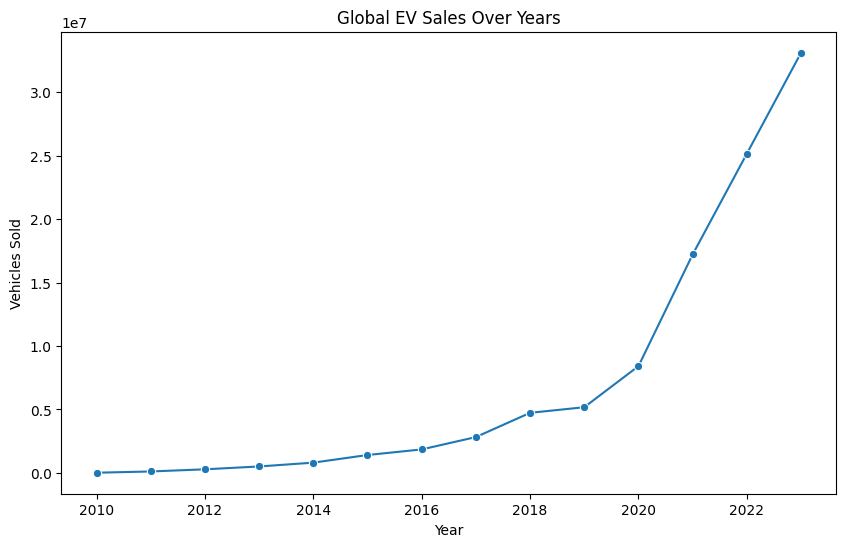

In [18]:
# Total EV Sales
ev_sales = df[df['parameter'] == 'EV sales']

# Group by Year
sales_by_year = ev_sales.groupby(['year'])['value'].sum().reset_index()

# Line Chart: Total EV Sales Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year, x='year', y='value', marker='o')
plt.title('Global EV Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Vehicles Sold')
plt.show()


# ===============================
# 📊 Regional EV Sales
# ===============================

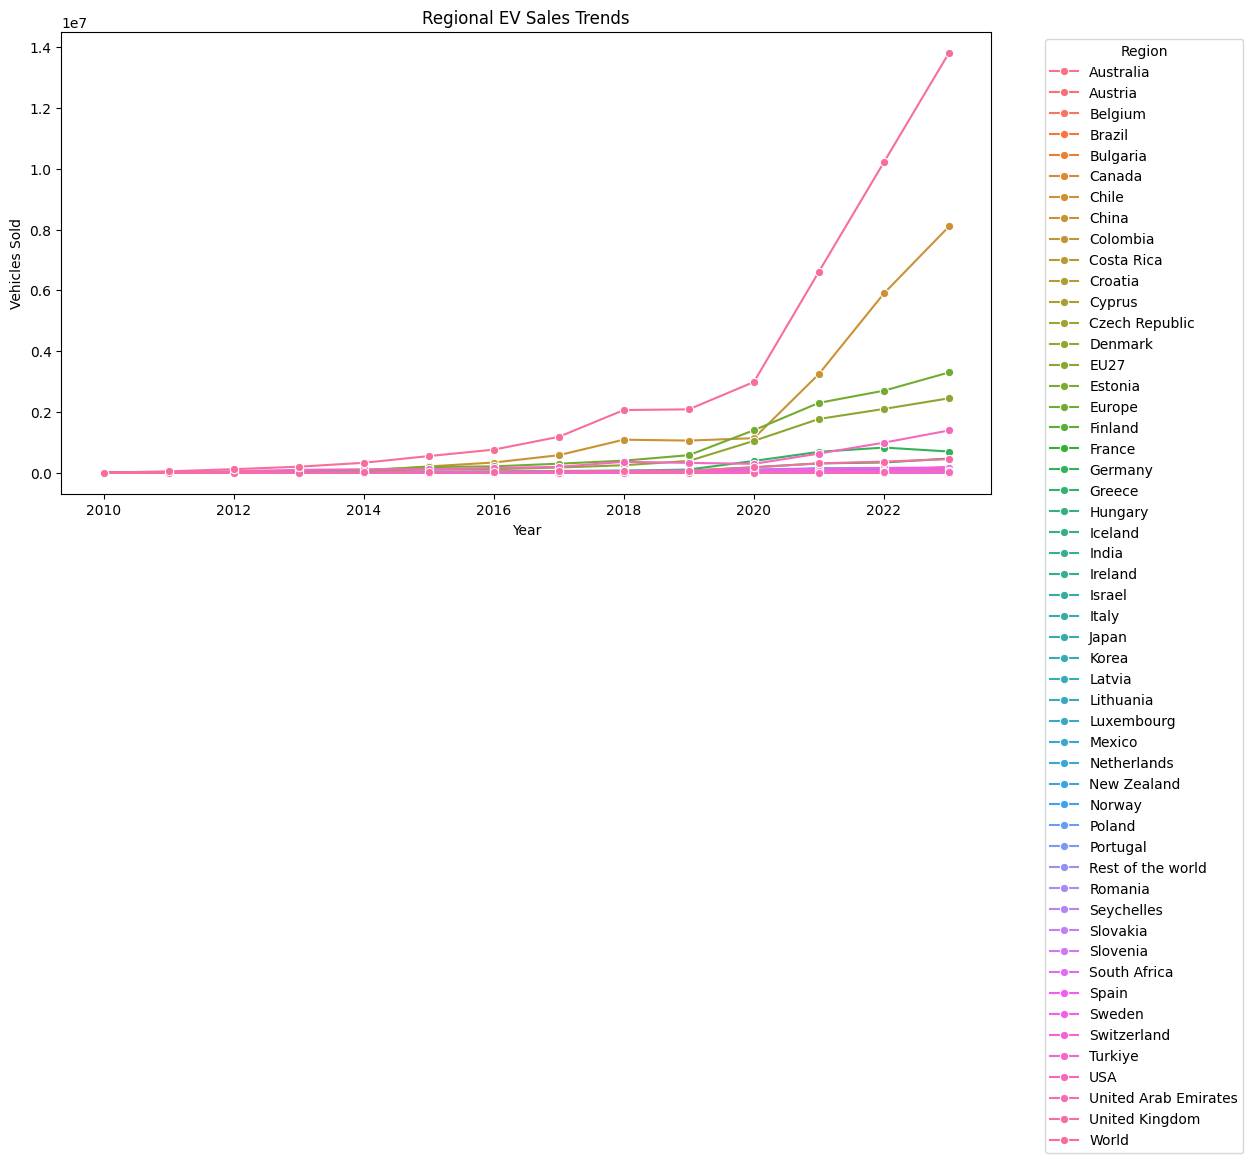

In [22]:
# Group by Region & Year
regional_sales = ev_sales.groupby(['region', 'year'])['value'].sum().reset_index()

# Regional Trends 
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_sales, x='year', y='value', hue='region', marker='o')
plt.title('Regional EV Sales Trends')
plt.xlabel('Year')
plt.ylabel('Vehicles Sold')

plt.legend(
    title='Region',
    bbox_to_anchor=(1.05, 1),  # Push right
    loc='upper left'           # Anchor to top-left of that box
)
plt.show()



# ===============================
# ⚡ Electricity Demand
# ===============================

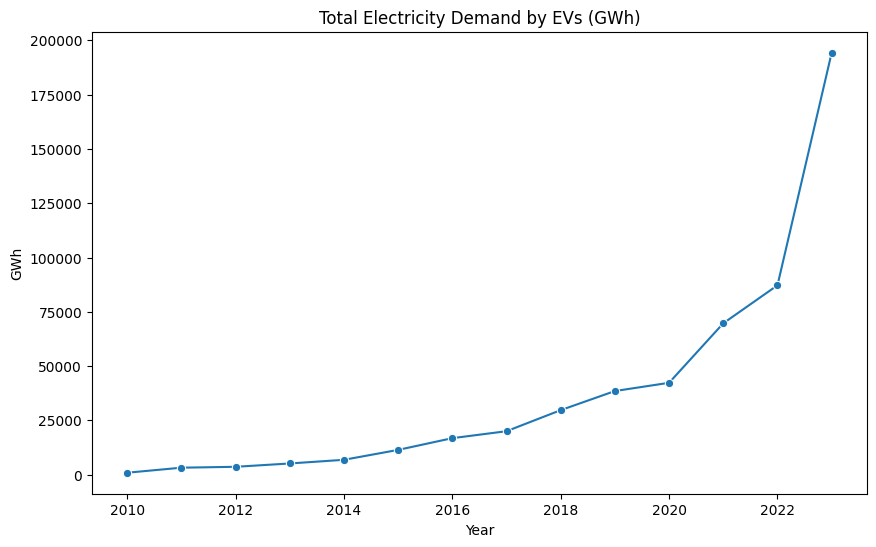

In [23]:
# Electricity demand
elec_demand = df[df['parameter'] == 'Electricity demand']

elec_demand_by_year = elec_demand.groupby(['year'])['value'].sum().reset_index()

# Plot: Electricity Demand
plt.figure(figsize=(10, 6))
sns.lineplot(data=elec_demand_by_year, x='year', y='value', marker='o')
plt.title('Total Electricity Demand by EVs (GWh)')
plt.xlabel('Year')
plt.ylabel('GWh')
plt.show()


# ===============================
# 🛢️ Oil Displacement
# ===============================

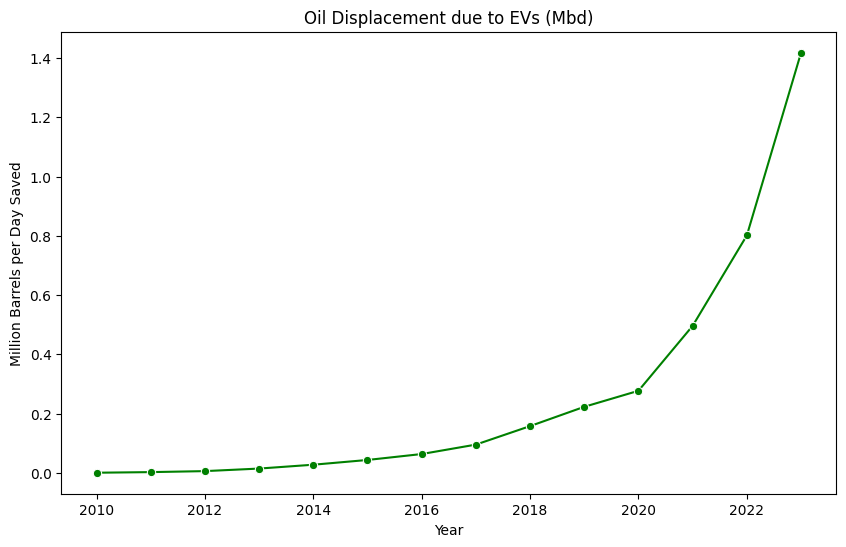

In [ ]:

oil_disp = df[df['parameter'] == 'Oil displacement Mbd']
oil_disp_year = oil_disp.groupby('year')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=oil_disp_year, x='year', y='value', marker='o', color='green')
plt.title('Oil Displacement due to EVs (Mbd)')
plt.xlabel('Year')
plt.ylabel('Million Barrels per Day Saved')
plt.show()


# ===============================
# 📊 EV Stock Share (%)
# ===============================


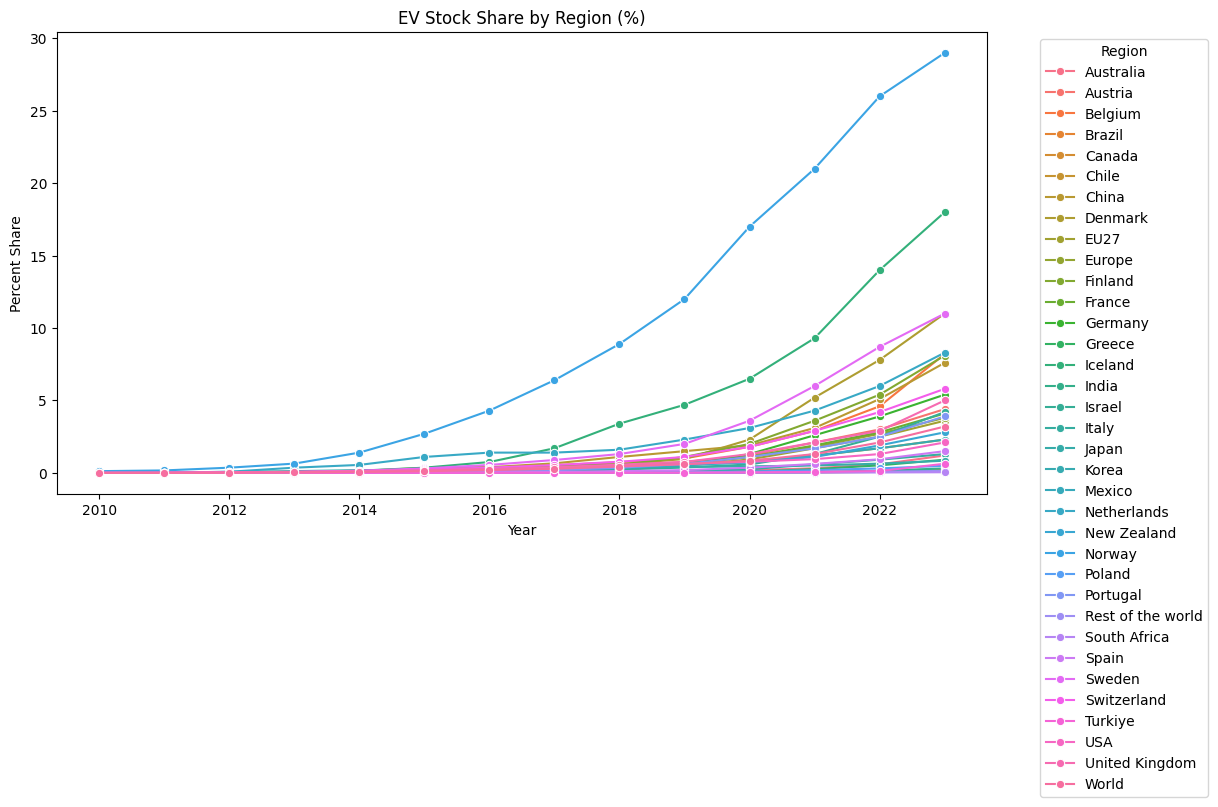

In [26]:
stock_share = df[df['parameter'] == 'EV stock share']

stock_share_region = stock_share.groupby(['region', 'year'])['value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=stock_share_region, x='year', y='value', hue='region', marker='o')
plt.title('EV Stock Share by Region (%)')
plt.xlabel('Year')
plt.ylabel('Percent Share')
plt.legend(
    title='Region',
    bbox_to_anchor=(1.05, 1),  # Push right
    loc='upper left'           # Anchor to top-left of that box
)
plt.show()

In [27]:
print("Analysis Complete !")

Analysis Complete !
